# Blast-wave fit to $\pi$, $K$, $p$ spectra in Pb-Pb collisions at the LHC

Transverse momentum spectra in high-energy Pb-Pb collisions can be described by a superposition of thermal sources which move with a velocity $\beta$ towards the detector. The functional form is given by

$$
\frac{1}{2 \pi p_T}\frac{dN}{dp_T dy} \propto m_T \int_{0}^{1} \hat r d \hat r I_0\left(\frac{p_T \sinh\rho(\hat r)}{T}\right) K_1\left(\frac{m_T \cosh\rho(\hat r)}{T}\right) 
$$

where $I_0$ and $K_1$ are [modified Bessel functions](https://en.wikipedia.org/wiki/Bessel_function#Modified_Bessel_functions). Here $T$ is the (kinetic) freeze-out temperature. The transverse mass is defined as $m_T = \sqrt{p_T^2 + m^2}$. The variable $\rho$ is the transverse rapidity, i.e., $\rho = \mathrm{arctanh}\,\beta$ where $\beta$ is the transverse velocity. The transverse velocity depends and the radial coordinate $r \equiv \hat r R$ as 

$$
\beta(\hat r) = \beta_s {\hat r}^n \equiv \beta_s \left( \frac{r}{R} \right)^n
$$

where $\beta_s$ is the velocity at the surface of the fireball (maximum radial distance $R$).

In this problem we perform a simultaneous fit to pion, kaon, and proton transverse momentum spectra in central (0-5\%) Pb-Pb collisions at 5.02 TeV center-of-mass energy (per nucleon-nucleon pair) in order to extract the model parameters $T$, $\beta_s$, and $n$. 

As a minimizer we use the numerical minimization software library [iminuit](https://pypi.org/project/iminuit/). You can install iminuit with ``pip install iminuit``. Check out the [iminuit documentation](https://iminuit.readthedocs.io/en/stable/index.html) for more information. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.special import k1
from scipy.special import i0
from iminuit import Minuit

In [2]:
# define blast-wave integrand (the term we have to integrate over radial coordinate r)
def dndpt_blastwave_integrand(r, pt, m, Tkin, beta_s, n):
    
    # your code here
    R = 1
    beta = beta_s*(r/R)**n # beta_s*2/(n+2)
    rho = np.arctanh(beta)
    mt = np.sqrt(pt**2+m**2)
    return pt * r * mt * i0(pt*np.sinh(rho)/Tkin) * k1(mt*np.cosh(rho)/Tkin)
    

In [3]:
# blast-wave function (dn/dpT dy) 
def dndpt_blastwave_not_vectorized(pt, m, Tkin, beta_s, n):
    integral, integral_err = integrate.quad(lambda r: dndpt_blastwave_integrand(r, pt, m, Tkin, beta_s, n), 0., 1.)
    return integral

# define a vectorized version of the blast-wave function that can take a numpy array of pt values as input
dndpt_blastwave = np.vectorize(dndpt_blastwave_not_vectorized, excluded=['m', 'Tkin', 'beta_s', 'n'])

#### a) Plot the blast-wave $p_T$ spectrum ($dN/dp_T$) for protons for two differnt surface velocities $\beta_s = 0.2$ and $\beta_s = 0.8$ in the range $0 \le p_T \le 3\,\mathrm{GeV}/c$. Use $T = 0.1\,\mathrm{GeV}$ and $n = 1.$

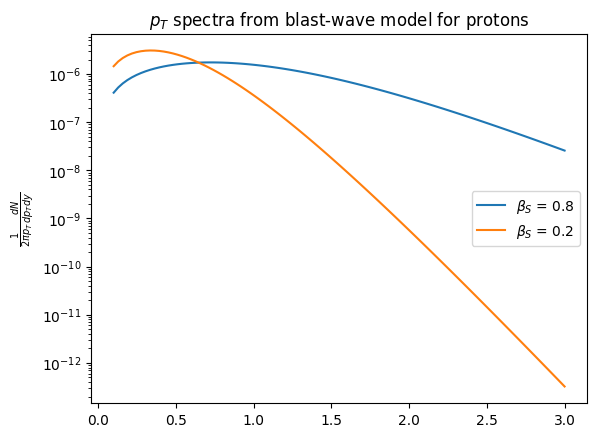

In [4]:
mp = 0.938 # proton mass in GeV
Tk = 0.1 # kinetic freeze-out temperature in GeV
n = 1

pt = np.linspace(0.1, 3., 100)

# your code here
plt.plot(pt,dndpt_blastwave(pt,mp,Tk,0.8,n),label = r"$\beta_S$ = 0.8")
plt.plot(pt,dndpt_blastwave(pt,mp,Tk,0.2,n),label = r"$\beta_S$ = 0.2")

# plt.plot(pt,dndpt_blastwave(pt,mp,Tk,0.,n),label = r"$\beta_S$ = 0")
plt.legend(loc='center right')
plt.title(r"$p_T$ spectra from blast-wave model for protons")
plt.ylabel(r"$\frac{1}{2 \pi p_T}\frac{dN}{dp_T dy}$")
plt.yscale('log')
# plt.xlim((0.1,3))
plt.show()

#### b) Download the [ALICE data from hepdata](https://www.hepdata.net/download/submission/ins1759506/1/csv). Here is the corresponding [ALICE paper](https://arxiv.org/abs/1910.07678). Extract the data tables from the tar file, e.g. on the command line with ``tar xvf HEPData-ins1759506-v1-csv.tar``. Read the pion, kaon, and proton spectra using the code below:

In [5]:
# read pion, kaon, and proton pT spectra in 0-5% Pb-Pb collisions at 5.02 TeV
# Hepdata https://www.hepdata.net/record/ins1759506
pt = {}
dndpt = {}
dndpt_err = {}
pt["pion"], dndpt["pion"], dndpt_err["pion"] = np.loadtxt("HEPData-ins1759506-v1-csv/Table1.csv", delimiter=',', usecols=(0,3,6), unpack=True, skiprows=13, max_rows=58)
pt["kaon"], dndpt["kaon"], dndpt_err["kaon"] = np.loadtxt("HEPData-ins1759506-v1-csv/Table3.csv", delimiter=',', usecols=(0,3,6), unpack=True, skiprows=13, max_rows=53)
pt["proton"], dndpt["proton"], dndpt_err["proton"] = np.loadtxt("HEPData-ins1759506-v1-csv/Table5.csv", delimiter=',', usecols=(0,3,6), unpack=True, skiprows=13, max_rows=51)

In [6]:
pt["pion"]

array([ 0.11 ,  0.13 ,  0.15 ,  0.17 ,  0.19 ,  0.225,  0.275,  0.325,
        0.375,  0.425,  0.475,  0.525,  0.575,  0.625,  0.675,  0.725,
        0.775,  0.825,  0.875,  0.925,  0.975,  1.05 ,  1.15 ,  1.25 ,
        1.35 ,  1.45 ,  1.55 ,  1.65 ,  1.75 ,  1.85 ,  1.95 ,  2.1  ,
        2.3  ,  2.5  ,  2.7  ,  2.9  ,  3.1  ,  3.3  ,  3.5  ,  3.7  ,
        3.9  ,  4.25 ,  4.75 ,  5.25 ,  5.75 ,  6.25 ,  6.75 ,  7.5  ,
        8.5  ,  9.5  , 10.5  , 11.5  , 12.5  , 13.5  , 14.5  , 15.5  ,
       17.   , 19.   ])

In [7]:
# define fit ranges for each particle, define also particle masses
pt_min = {"pion": 0.5, "kaon": 0.2, "proton": 0.3}
pt_max = {"pion": 1.0, "kaon": 1.5, "proton": 3.0}
mass = {"pion": 0.139, "kaon": 0.494, "proton": 0.938}

In [8]:
# prepare data in the selected pt ranges
pt_meas = {}
dndpt_meas = {}
dndpt_meas_err = {}
for particle in ["pion", "kaon", "proton"]:
    sel = (pt[particle] >= pt_min[particle]) & (pt[particle] <= pt_max[particle])
    pt_meas[particle] = pt[particle][sel]
    dndpt_meas[particle] = dndpt[particle][sel]
    dndpt_meas_err[particle] = dndpt_err[particle][sel]

We take the normalization of the blast-wave function as an arbitrary parameter that we adjust in the fit range for a given set of blast-wave parameters $T$, $\beta_s$, and $n$. A simple least squares minimization gives the following formula for the normalization (factor in front of the blast-wave formula):

$$
A = \frac{\sum_i \frac{y_i^\mathrm{data} y_i^\mathrm{BW}}{\sigma_i^2}}{\sum_i \frac{ {y_i^\mathrm{BW}}^2 }{\sigma_i^2} }
$$

This is implemented in the function 'normalization' (see below).

In [9]:
# calculate normalization of the blastwave function for given blastwave parameters and particle species
def normalization(particle, Tkin, beta_s, n):
    dndpt_bw = dndpt_blastwave(pt_meas[particle], mass[particle], Tkin, beta_s, n)
    err_square = dndpt_meas_err[particle]**2
    A_num = np.sum((dndpt_meas[particle] * dndpt_bw) / err_square)
    A_den = np.sum(dndpt_bw**2 / err_square)
    return A_num / A_den    

Next we implement a function that returns the $\chi^2$ for a given particle species

In [10]:
# chi2 for a given particle species
def chi2_particle(particle, Tkin, beta_s, n):
    
    # blast-wave prediction
    dndpt_bw = dndpt_blastwave(pt_meas[particle], mass[particle], Tkin, beta_s, n)

    # normalization
    A = normalization(particle, Tkin, beta_s, n)

    pulls = (dndpt_meas[particle] - A * dndpt_bw) / dndpt_meas_err[particle]
    return np.sum(pulls * pulls)    

#### c) Implement the total $\chi^2$ as the sum of the contributions from pions, kaons, and protons

In [11]:
# total chi2 for all considered particles

def chi2(Tkin, beta_s, n):

    # your code here
    return chi2_particle("pion",Tkin,beta_s,n) + chi2_particle("kaon",Tkin,beta_s,n) + chi2_particle("proton",Tkin,beta_s,n)

Now we perform the $\chi^2$ fit using iminuit

In [12]:
m = Minuit(chi2, Tkin=0.1, beta_s=0.85, n=1.)
m.errordef = Minuit.LEAST_SQUARES

# define limits for Tkin, beta_s, and n
m.limits = [(0, 0.3), (0, 1.), (0., 3.)]

# perform the chi2 minimization and calculate the covariance matrix of the parameters
m.migrad()
m.hesse() 

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 79.55                      │              Nfcn = 96               │
│ EDM = 2.94e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ Tkin   │  0.0896   │  0.0028   │            │            │    0    │   0.3   │       │
│ 1 │ beta_s │  0.9072   │  0.0025   │            │            │    0    │    1    │       │
│ 2 │ n      │   0.735   │   0.013   │            │            │    0    │    3    │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬───────────────────────────────┐
│        │      Tkin    beta_s         n │
├────────┼───────────────────────────────┤
│   Tkin │  7.65e-06 -5.38e-06  3.34e-06 │
│ beta_s │ -5.38e-06  6.24e-06  1.28e-05 │
│      n │  3.34e-06  1.28e-05  0.000173 │
└────────┴───────────────────────────────┘

Now we plot the fit result along with the measured pion, kaon, and proton spectra

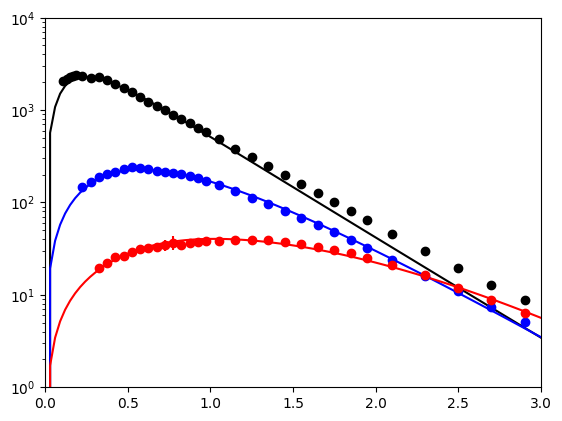

In [13]:
# measured pion, kaon, proton pt spectra
plt.errorbar(pt["pion"], dndpt["pion"], yerr=dndpt_err["pion"], fmt='o', color='black')
plt.errorbar(pt["kaon"], dndpt["kaon"], yerr=dndpt_err["kaon"], fmt='o', color='blue')
plt.errorbar(pt["proton"], dndpt["proton"], yerr=dndpt_err["proton"], fmt='o', color='red')
plt.xlim(0.,3.)
plt.ylim(1,1e4)
plt.yscale("log")

# fit parameters
Tkin = m.values['Tkin']
beta_s = m.values['beta_s']
n = m.values['n']

# fit results
ptv = np.linspace(0., 3., 100)
dndpt_bw_pion = dndpt_blastwave(ptv, mass["pion"], Tkin, beta_s, n);
dndpt_bw_kaon = dndpt_blastwave(ptv, mass["kaon"], Tkin, beta_s, n);
dndpt_bw_proton = dndpt_blastwave(ptv, mass["proton"], Tkin, beta_s, n);

A_pion = normalization("pion", Tkin, beta_s, n)
A_kaon = normalization("kaon", Tkin, beta_s, n)
A_proton = normalization("proton", Tkin, beta_s, n)

plt.plot(ptv, A_pion * dndpt_bw_pion, color='black')
plt.plot(ptv, A_kaon * dndpt_bw_kaon, color='blue')
plt.plot(ptv, A_proton * dndpt_bw_proton, color='red')

Finally we draw the $1\sigma$ error ellipse for the $T$ and $\beta_s$ with the aid of 'get_cov_ellipse'

In [14]:
def get_cov_ellipse(cov, centre, nstd, **kwargs):
    """
    Return a matplotlib Ellipse patch representing the covariance matrix
    cov centred at centre and scaled by the factor nstd.
    """

    # Find and sort eigenvalues and eigenvectors into descending order
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    theta = np.arctan2(vy, vx)

    # Width and height of ellipse to draw
    width, height = 2 * nstd * np.sqrt(eigvals)
    return Ellipse(xy=centre, width=width, height=height,
                   angle=np.degrees(theta), **kwargs)

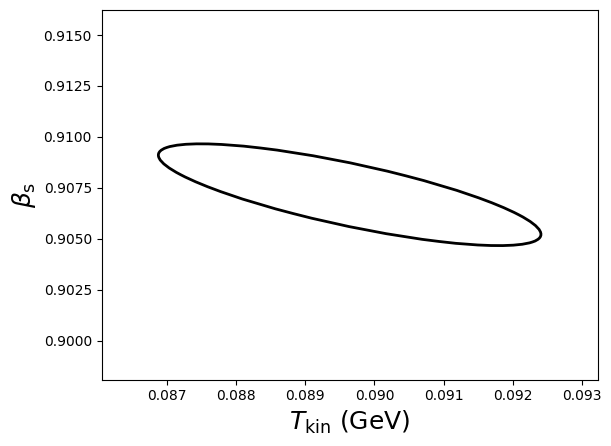

In [15]:
V = m.covariance
# V_Tkin_betas = V[0:2, 0:2] # sub-matrix giving the covariance matrix for Tkin and beta 
V_Tkin_betas = np.array([[V[0,0], V[0,1]],[V[1,0],V[1,1]]])
from matplotlib.patches import Ellipse
fig, ax = plt.subplots()
el = get_cov_ellipse(V_Tkin_betas, (Tkin, beta_s), 1, linewidth=2, fill=False)
ax.add_artist(el)
ax.set_xlim(Tkin - 0.04 * Tkin, Tkin + 0.04 * Tkin)
ax.set_ylim(beta_s - 0.01 * beta_s, beta_s + 0.01 * beta_s)
ax.set_xlabel(r"$T_\mathrm{kin}$ (GeV)", fontsize=18)
ax.set_ylabel(r"$\beta_\mathrm{s}$", fontsize=18)
plt.show()